In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Assignment 1 Set 3 Dataset.csv")

In [3]:
#Printing two rows for sanity check
df.head(2)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive


The dataset seems to be sane


In [4]:
df["class"].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [5]:
df["class"].value_counts(1)

Positive    0.615385
Negative    0.384615
Name: class, dtype: float64

The positive class is makes upto 61% of the data. Therefore we can say that the predictor class is imbalanced. However we can continue with the pre processing and model building to see if the imbalance in target data will affect the performance

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

There are no null values in the dataset.

In [7]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [8]:
df.skew()

Age    0.329359
dtype: float64

In [9]:
columns_categorical = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']

In [10]:
df[columns_categorical].describe()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


In [11]:
df.duplicated().sum()

269

There are 269 rows which are duplicated values. These can be removed as they are redundant data

In [12]:
df[df.duplicated()]["class"].value_counts(1)

Positive    0.546468
Negative    0.453532
Name: class, dtype: float64

In [13]:
dupcheck_df = df.drop_duplicates()
dupcheck_df["class"].value_counts(1)

Positive    0.689243
Negative    0.310757
Name: class, dtype: float64

Dropping the duplicates has created more imbalance in the dataset. However as the duplicates are redundant we need to remove them

In [14]:
df.drop_duplicates(inplace  = True)

C:\Users\srikanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


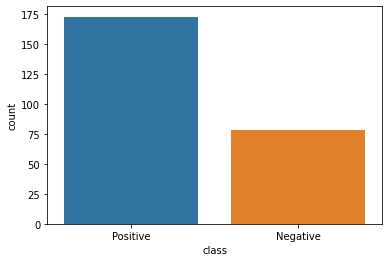

In [15]:
sns.countplot(df["class"]);

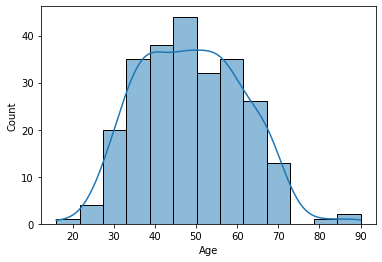

In [16]:
sns.histplot(df["Age"],kde = True);

Interesting thing to notice is there is no person in the dataset within the age of 70 to 80

C:\Users\srikanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


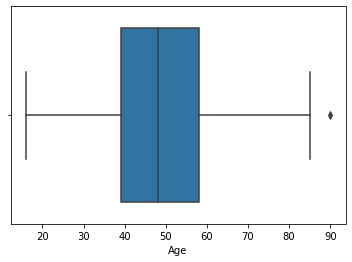

In [17]:
sns.boxplot(df["Age"]);

In [18]:
for feature in df.columns:
    if df[feature].dtype=="object":
        df[feature] = pd.Categorical(df[feature]).codes

In [19]:
df["class"].value_counts(1)

1    0.689243
0    0.310757
Name: class, dtype: float64

In [20]:
df.head(2)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1


<AxesSubplot:>

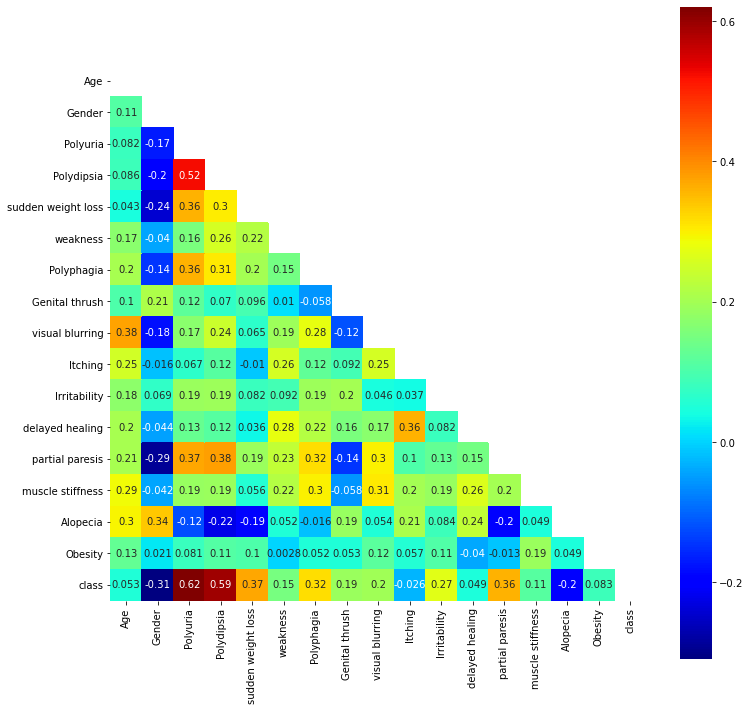

In [21]:
mask = np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot = True, cmap = "jet", mask= mask, square = True)

## Model Building

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df_bkp = df.copy()

In [24]:
#Take the features in x and predictor in y
X = df.drop(["class"],axis = 1)
y = df.pop("class")

In [25]:
X.head(2)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0


In [26]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int8

In [27]:
#Train test split. Using random state as 0 to get the same train test split
X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [28]:
#Trying out a different train test split, with 30% testing data
X_train_1, X_test_1, train_labels_1, test_labels_1 = train_test_split(X,y,test_size = 0.30, random_state = 0)

In [29]:
train_labels.value_counts(1)

1    0.675
0    0.325
Name: class, dtype: float64

In [30]:
test_labels.value_counts(1)

1    0.745098
0    0.254902
Name: class, dtype: float64

In [31]:
train_labels_1.value_counts(1)

1    0.691429
0    0.308571
Name: class, dtype: float64

In [32]:
test_labels_1.value_counts(1)

1    0.684211
0    0.315789
Name: class, dtype: float64

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr_model = LogisticRegression(max_iter = 1000)

In [35]:
lr_model.fit(X_train, train_labels)

LogisticRegression(max_iter=1000)

In [36]:
ytest_predict = lr_model.predict(X_test)
ytrain_predict = lr_model.predict(X_train)

## Model Evaluation 

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [38]:
lr_model.score(X_train, train_labels)

0.895

In [39]:
lr_model.score(X_test, test_labels)

0.8627450980392157

In [40]:
confusion_matrix(train_labels, ytrain_predict)

array([[ 55,  10],
       [ 11, 124]], dtype=int64)

In [41]:
confusion_matrix(test_labels, ytest_predict)

array([[10,  3],
       [ 4, 34]], dtype=int64)

In [42]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        65
           1       0.93      0.92      0.92       135

    accuracy                           0.90       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.90      0.90      0.90       200



In [43]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.92      0.89      0.91        38

    accuracy                           0.86        51
   macro avg       0.82      0.83      0.82        51
weighted avg       0.87      0.86      0.86        51



AUC : 0.969


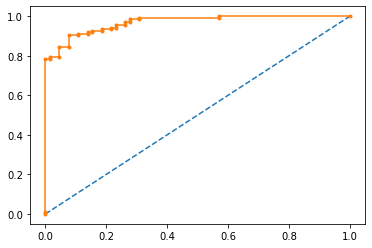

In [44]:
probs_tr_lr = lr_model.predict_proba(X_train)
probs_tr_lr = probs_tr_lr[:,1]
auc_tr_lr = roc_auc_score(train_labels, probs_tr_lr)
print("AUC : %.3f" %auc_tr_lr)
fpr_tr_lr, tpr_tr_lr, thresholds_tr_lr = roc_curve(train_labels, probs_tr_lr)
plt.plot([0,1],[0,1], linestyle="--")
plt.plot(fpr_tr_lr,tpr_tr_lr, marker = ".")
plt.show()

AUC : 0.970


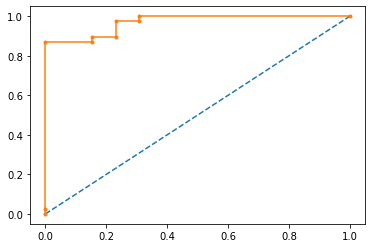

In [45]:
probs_te_lr = lr_model.predict_proba(X_test)
probs_te_lr = probs_te_lr[:,1]
auc_te_lr = roc_auc_score(test_labels, probs_te_lr)
print("AUC : %.3f" %auc_te_lr)
fpr_te_lr, tpr_te_lr, thresholds_te_lr = roc_curve(test_labels, probs_te_lr)
plt.plot([0,1],[0,1], linestyle="--")
plt.plot(fpr_te_lr,tpr_te_lr, marker = ".")
plt.show()

### Decision Trees

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt_model = DecisionTreeClassifier(criterion="gini", random_state = 1)

In [48]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [49]:
dt_model.score(X_train, train_labels)

1.0

In [50]:
dt_model.score(X_test, test_labels)

0.9019607843137255

In [51]:
#To run if needed
#Using grid search cv for finding the best hyperparameters for our model
from sklearn.model_selection import GridSearchCV 
param_grid = {
    "max_depth" : [2,3,4],
    "min_samples_leaf" : [20,25,30,35],
    "min_samples_split" : [20,30,40]
}

In [52]:
dt_model = DecisionTreeClassifier(criterion="gini", random_state = 1)

In [53]:
grid_search = GridSearchCV(estimator = dt_model, param_grid=param_grid, cv=10)

In [54]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [20, 25, 30, 35],
                         'min_samples_split': [20, 30, 40]})

In [55]:
grid_search.best_params_

{'max_depth': 2, 'min_samples_leaf': 20, 'min_samples_split': 20}

In [56]:
best_dt_model = grid_search.best_estimator_

In [57]:
best_dt_model.score(X_test, test_labels)

0.8627450980392157

In [58]:
best_dt_model.score(X_train, train_labels)

0.87

In [59]:
ytest_predict_dt = best_dt_model.predict(X_test)
ytrain_predict_dt = best_dt_model.predict(X_train)

In [60]:
confusion_matrix(train_labels, ytrain_predict_dt)

array([[ 59,   6],
       [ 20, 115]], dtype=int64)

In [61]:
confusion_matrix(test_labels, ytest_predict_dt)

array([[10,  3],
       [ 4, 34]], dtype=int64)

In [62]:
print(classification_report(train_labels, ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        65
           1       0.95      0.85      0.90       135

    accuracy                           0.87       200
   macro avg       0.85      0.88      0.86       200
weighted avg       0.88      0.87      0.87       200



In [63]:
print(classification_report(test_labels, ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.92      0.89      0.91        38

    accuracy                           0.86        51
   macro avg       0.82      0.83      0.82        51
weighted avg       0.87      0.86      0.86        51



AUC : 0.907


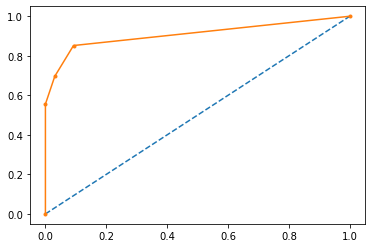

In [64]:
probs_tr_dt = best_dt_model.predict_proba(X_train)
probs_tr_dt = probs_tr_dt[:,1]
auc_tr_dt = roc_auc_score(train_labels, probs_tr_dt)
print("AUC : %.3f" %auc_tr_dt)
fpr_tr_dt, tpr_tr_dt, thresholds_tr_dt = roc_curve(train_labels, probs_tr_dt)
plt.plot([0,1],[0,1], linestyle="--")
plt.plot(fpr_tr_dt,tpr_tr_dt, marker = ".")
plt.show()

AUC : 0.907


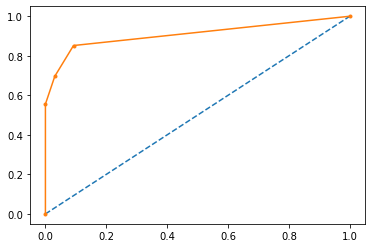

In [65]:
probs_te_dt = best_dt_model.predict_proba(X_train)
probs_te_dt = probs_te_dt[:,1]
auc_te_dt = roc_auc_score(train_labels, probs_te_dt)
print("AUC : %.3f" %auc_tr_dt)
fpr_te_dt, tpr_te_dt, thresholds_te_dt = roc_curve(train_labels, probs_te_dt)
plt.plot([0,1],[0,1], linestyle="--")
plt.plot(fpr_te_dt,tpr_te_dt, marker = ".")
plt.show()